# TUTORIAL 2 : The _Site_ class and the computation of site variables

In this tutorial we shall explore the _solrad.Site.Site_ class and see how it can be used to 
compute relevant variables of a site, related to climate and geography. Doing this is a necessary
step to prepare our simulation of solar radiation.

### IMPORTATION OF LIBRARIES

In [1]:
import os
import solrad
import numpy as np
from solrad.Site import Site
import solrad.auxiliary_funcs as aux

### DEFINITION DEFAULT PATH VARIABLES

Define the directory where the data files for each atmospheric quantity are stored (see tutorial 1). You must replace the value of the paths as they appear below to the ones you actually use for your system. We recommend that you don't leave the default paths as they are (these are intended for developers). 

In [2]:
DATA_PATH = os.path.join(os.path.dirname(os.path.dirname(solrad.__path__[0])), "data")
OZONE_DATABASE_PATH = os.path.join(DATA_PATH, "ozone")
WATER_DATABASE_PATH = os.path.join(DATA_PATH, "water")
AOD_550NM_DATABASE_PATH = os.path.join(DATA_PATH, "aod_550nm")

### 1) INITIALIZATION OF SITE OBJECT

We shall first initialize an instance of the class _Site_. _Site_ is the main class used for modelling the 
variales of a site related to geography and climate. In order to initialize a Site object we require some
information about the geographical location that we are tying to simulate. For this example, we'll use 
the city of Medellín, Colombia. As a point of reference. 

In [3]:
MEDELLIN_LATITUDE      = 6.230833    # (degrees)
MEDELLIN_LONGITUDE     = -75.590553  # (degrees)
MEDELLIN_ALTITUDE      = 1500        # (meters)
MEDELLIN_TIMEZONE      ='-05:00'     # (GMT-5)
MEDELLIN_AEROSOL_MODEL = "Urban"     # (Urban 'Shettel and Fenn' aerosol model)

Site_obj = Site(latitude  = MEDELLIN_LATITUDE,
                longitude = MEDELLIN_LONGITUDE,
                altitude  = MEDELLIN_ALTITUDE,
                tz        = MEDELLIN_TIMEZONE,
                name      = 'Medellín',
                SF_model  = MEDELLIN_AEROSOL_MODEL)

### 2) TERRAIN AND HORIZON

We can set set, load, reset and plot the horizon profile of the simulation site.

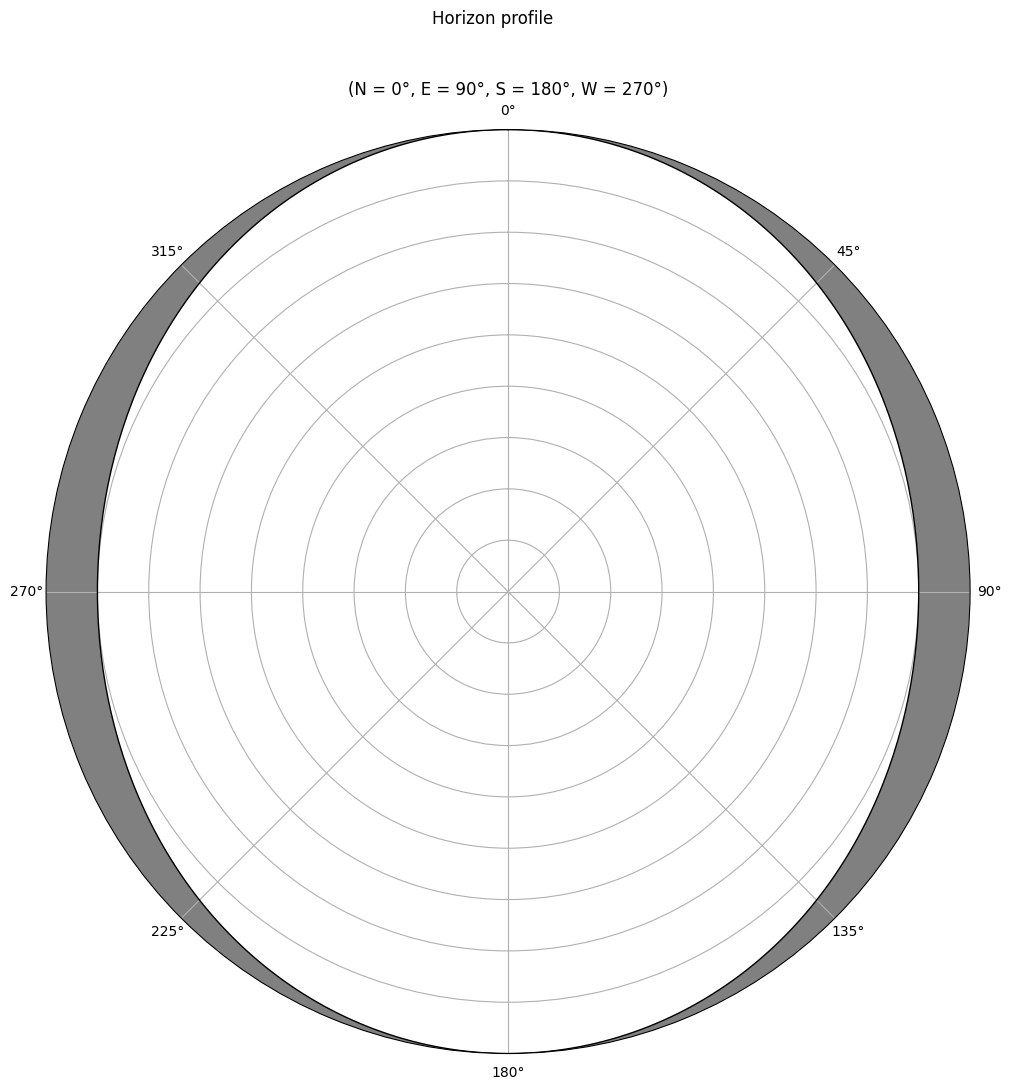

<Figure size 640x480 with 0 Axes>

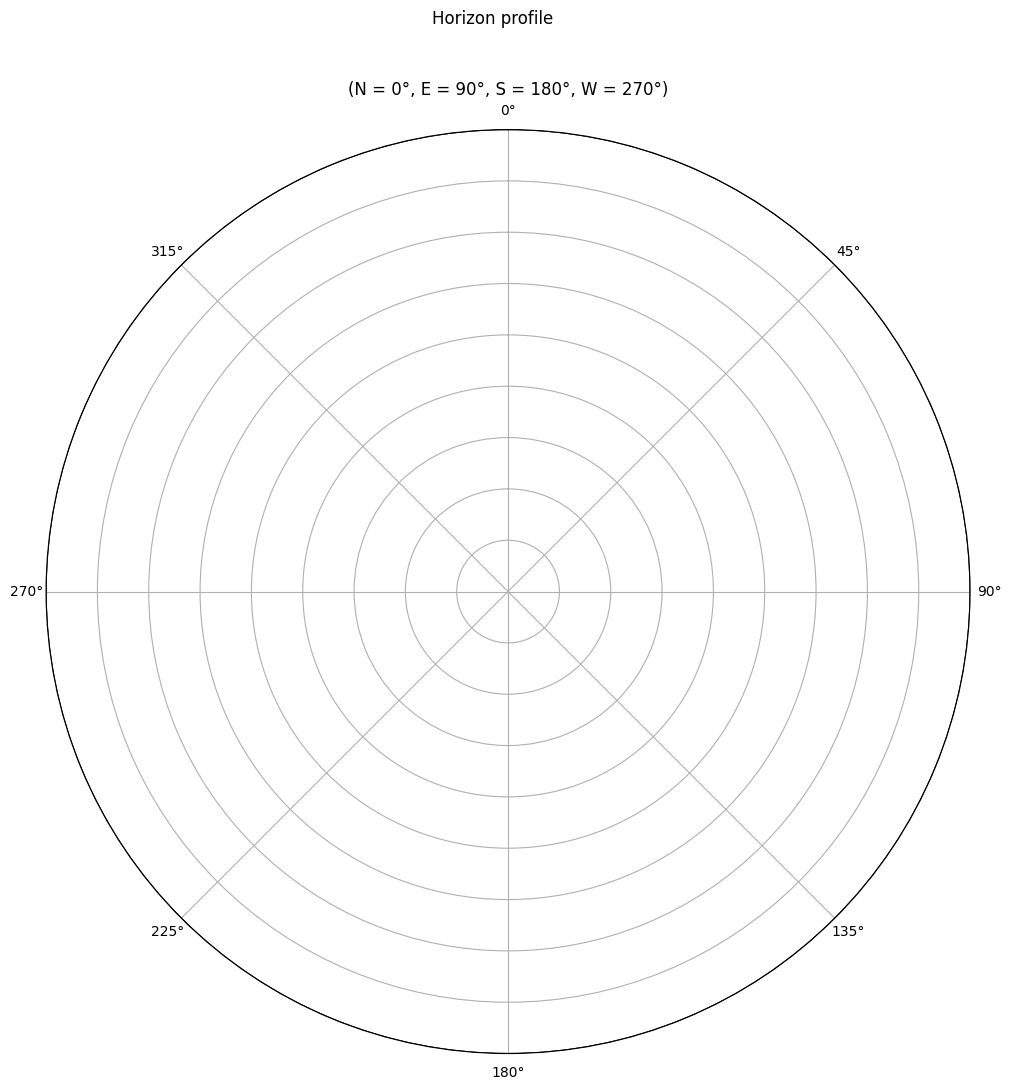

<Figure size 640x480 with 0 Axes>

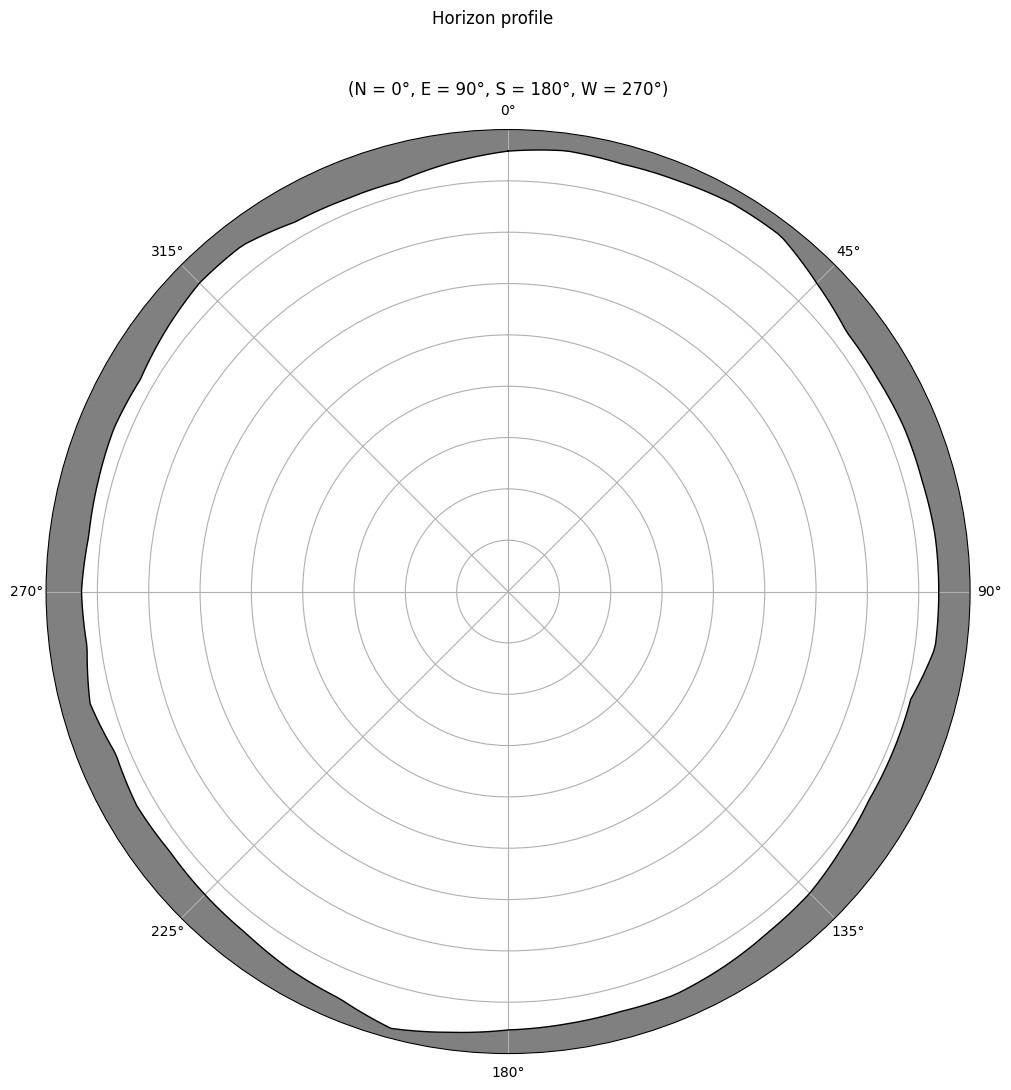

<Figure size 640x480 with 0 Axes>

In [4]:
# The horizon by default is set to 0 degrees everywhere for the site object.
# However, as a user, you can define your own custom horizon profile and plot it:
azimuths   = np.linspace(0, 360, 361)            #(degrees)
elevations = 10*np.sin(np.deg2rad(azimuths))**2  #(degrees)
Site_obj.set_horizon_from_arrays(azimuth=azimuths, elevation=elevations)
Site_obj.plot_horizon(azimuth=azimuths)

# You can also go back to the default horizon settings by restting the horizon profile.
Site_obj.reset_horizon()
Site_obj.plot_horizon(azimuth=azimuths)

# Finally, you can let Site_obj set the horizon profile for you. This step
# uses pvgis' API horizon profile from their geographical database.
Site_obj.set_horizon_from_pvgis()
Site_obj.plot_horizon(azimuth=azimuths)

### 3) DEFINE SIMULATION TIME

Next we would like to define the period of time for which the simulation is to be run.
For this example, we'd like to simulate the whole month of January of 2023. Hence, we set our start time 
to be: Jan 1st 2023 at midnight, and our end time to be: Jan 31st 2023 6 seconds before midnight.
We would also like that the time data generated have a sample frequency of 5 minutes.
Finally, since our end goal with this library is simulating sun radiation, there's not point 
in keeping the time data for which the sun is not out.Hence, we filter the time data such that hours 
before sunrise and after sunset are removed. 

In [7]:
simulation_start_time = "2023-1-1 00:00:00"
simulation_end_time   = "2023-1-31 23:59:59.9"
simulation_time_frequency  = "5min"
minimum_hour_minute_second_allowed = "sunrise"
maximum_hour_minute_second_allowed = "sunset"

Site_obj.define_simulation_time_data(start_time = simulation_start_time,
                                     end_time   = simulation_end_time, 
                                     freq       = simulation_time_frequency, 
                                     min_hms    = minimum_hour_minute_second_allowed,
                                     max_hms    = maximum_hour_minute_second_allowed)

# This command generates an attribute called 'self.simulation_time_data'.
# It is a dict where each key is a date of simulation:
print(Site_obj.simulation_time_data.keys())

print("------------------------------------------")

# Let's check out the contents for Jan 10th 2023:
print(Site_obj.simulation_time_data[(2023, 1, 10)]) 

dict_keys([(2023, 1, 1), (2023, 1, 2), (2023, 1, 3), (2023, 1, 4), (2023, 1, 5), (2023, 1, 6), (2023, 1, 7), (2023, 1, 8), (2023, 1, 9), (2023, 1, 10), (2023, 1, 11), (2023, 1, 12), (2023, 1, 13), (2023, 1, 14), (2023, 1, 15), (2023, 1, 16), (2023, 1, 17), (2023, 1, 18), (2023, 1, 19), (2023, 1, 20), (2023, 1, 21), (2023, 1, 22), (2023, 1, 23), (2023, 1, 24), (2023, 1, 25), (2023, 1, 26), (2023, 1, 27), (2023, 1, 28), (2023, 1, 29), (2023, 1, 30), (2023, 1, 31)])
------------------------------------------
DatetimeIndex(['2023-01-10 06:20:00-05:00', '2023-01-10 06:25:00-05:00',
               '2023-01-10 06:30:00-05:00', '2023-01-10 06:35:00-05:00',
               '2023-01-10 06:40:00-05:00', '2023-01-10 06:45:00-05:00',
               '2023-01-10 06:50:00-05:00', '2023-01-10 06:55:00-05:00',
               '2023-01-10 07:00:00-05:00', '2023-01-10 07:05:00-05:00',
               ...
               '2023-01-10 17:15:00-05:00', '2023-01-10 17:20:00-05:00',
               '2023-01-10 17:25

As we can see, we have a DatetimeIndex with a frequency of 5 minutes, which starts
on the (approximate) time of sunrise and ends on the (approximate) time of sunset. 
Finally, the _self.define_simulation_time_data_ method is actually quite flexible and many different
time intervals with other conditions can be defined. Please check the documentation if
you want to learn more.

###    3.5) PRINCIPAL ATTRIBUTES OF _Site_obj_ 

After generating the _self.simulation_time_data_ attribute, other important attributes are generated.
Namely, the _self.climate_and_air_data_, _self.sun_data_, _self.single_scattering_albedo_ and _self.aerosol_asymmetry_factor_.
These are dicts (the same keys as _self.simulation_time_data_) containing pandas.DataFrames which hold relevant information about 
the site being modeled at each point in time. In broad terms:

1) _self.climate_and_air_data_     : Contains information about the site's climate and air-related quantities.
2) _self.sun_data_                 : Contains information about the position of the sun and relative airmass.
3) _self.single_scattering_albedo_ : Contains information about the single scattering albedo property of aerosols for different wavelengths.
4) _self.aerosol_asymmetry_factor_ : Contains information about the aerosol asymmetry factor property of aerosols for different wavelengths.

In [8]:
# Let's see check out how each attribute looks like for a particular date (Jan 10th 2023):
print("--------------------------- ")
print("        DATAFRAMES          ")
print("--------------------------- ")

print("---- self.climate_and_air_data ---- ")
print(Site_obj.climate_and_air_data[(2023, 1, 10)])

print("---- self.sun-data ---- ")
print(Site_obj.sun_data[(2023, 1, 10)])

print("---- self.single_scattering_albedo ---- ")
print(Site_obj.single_scattering_albedo[(2023, 1, 10)])

print("---- self.aerosol_asymmetry_factor ---- ")
print(Site_obj.aerosol_asymmetry_factor[(2023, 1, 10)])


# Let's print the columns in each DataFrame.
print("--------------------------- ")
print("        COLUMNS             ")
print("--------------------------- ")

print("---- self.climate_and_air_data ---- ")
print(Site_obj.CLIMATE_AND_AIR_DATA_COLS)

print("---- self.sun-data ---- ")
print(Site_obj.SUN_DATA_COLS)

print("---- self.single_scattering_albedo ---- ")
print(Site_obj.AEROSOL_COLS)

print("---- self.aerosol_asymmetry_factor ---- ")
print(Site_obj.AEROSOL_COLS)


# And also know their meaning and units.
print("--------------------------- ")
print("   DESCRIPTIONS AND UNITS   ")
print("--------------------------- ")

print(Site_obj.variables_info["descriptions"])
print(Site_obj.variables_info["units"])

--------------------------- 
        DATAFRAMES          
--------------------------- 
---- self.climate_and_air_data ---- 
                           hms_float G(h) Gb(n) Gd(h)  T2m   SP   RH   O3  \
2023-01-10 06:20:00-05:00   6.333333  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 06:25:00-05:00   6.416667  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 06:30:00-05:00   6.500000  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 06:35:00-05:00   6.583333  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 06:40:00-05:00   6.666667  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
...                              ...  ...   ...   ...  ...  ...  ...  ...   
2023-01-10 17:40:00-05:00  17.666667  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 17:45:00-05:00  17.750000  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 17:50:00-05:00  17.833333  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 17:55:00-05:00  17.916667  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2023-01-10 18:00:00-05:00  18

###    4) FILLING THE MAIN ATTRIBUTES OF _Site_obj_

In order to perform a simulation, the data for each of Site_obj's main attributes must be provided.
You can do this manually, if you have your own data that you'd like to use. In that case, just fill
each of the DataFrames with it, for each date. However, the _Site_ class, already provides an arrange
of methods that can be used for acquiring and filling all the required data as easy as possible.
For this example, we shall follow this latter approach.
Finally, while the execution of this tutorial should preferably be followed in the order intended, 
here it is more or less required, since many quantities require the previous computation of other quantities.

4.1) SET AND COMPUTE CLIMATE DATA

In [9]:
# Compute and fill site data related to climate.
Site_obj.set_climate_data_from_pvgis_tmy_data(startyear=2005, endyear=2015)
Site_obj.compute_extraterrestrial_normal_irradiance()
Site_obj.compute_cummulative_time_integral_of_irradiances()

4.2) COMPUTE SUN DATA

In [10]:
# Compute and fill site data related sun position and relative airmass.
Site_obj.compute_sun_data()

4.3) COMPUTE AIR DATA

In [11]:
# We compute and fill site data related to air quantities.

# 4.31) -- ATMOSPHERIC OZONE COLUMN --
# There are two options for computing the ozone column.
# We can use the van heuklon model or, if we have the data
# (see tutorial 1), we can use satellite data.
"""
Site_obj.compute_ozone_column_using_van_Heuklon_model()
"""
Site_obj.compute_ozone_column_using_satelite_data(path = OZONE_DATABASE_PATH)

# 4.32) -- ATMOSPHERIC WATER COLUMN --
# There are two options for computing the water column.
# We can use the gueymard model or, if we have the data
# (see tutorial 1), we can use satellite data.
"""
Site_obj.compute_water_column_using_gueymard94_model()
"""
Site_obj.compute_water_column_using_satelite_data(path = WATER_DATABASE_PATH)

# 4.33) -- ANGSTROM EXPONENT AT 500 nm--
Site_obj.compute_angstrom_turbidity_exponent_500nm_using_SF_model()

# 4.34) -- AERSOL OPTICAL DEPTH AT 500 nm --
# For this step we do have to previously set up
# # the satellite data we need to use (see tutorial 1).
Site_obj.compute_aod_500nm_using_satelite_data(path = AOD_550NM_DATABASE_PATH)

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\water_column.py:499: UserWarning: Local water column database is empty of filled_NaNs.npy files. No column water filled_NaNs.npy files to retrieve were found.
  warnings.warn(msg)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\water_column.py:536: UserWarning: Not all raw.npy files have an associated filled_NaNs.npy file in the database, and viceversa. Therefore, not all information will be available for all files.
  warnings.warn(msg)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\aod_550nm.py:490: UserWarning: Local aod_550nm database is empty of filled_NaNs.npy files. No column water filled_NaNs.npy files to retrieve were found.
  warnings.warn(msg)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\aod_550nm.py:527: UserWarning: Not all raw.npy files have an associated filled_NaNs.npy file in the database, and viceversa. Therefore, not all information will be available for

4.4) COMPUTE AEROSOL PROPERTIES

In [12]:
Site_obj.compute_single_scattering_albedo_using_SF_model()
Site_obj.compute_aerosol_asymmetry_factor_using_SF_model()
Site_obj.compute_spectrally_averaged_aerosol_asymmetry_factor()

### 5) VISUALIZE AND MANIPULATE DATA

We can very easily plot data from the main attributes and interpolated if need be.

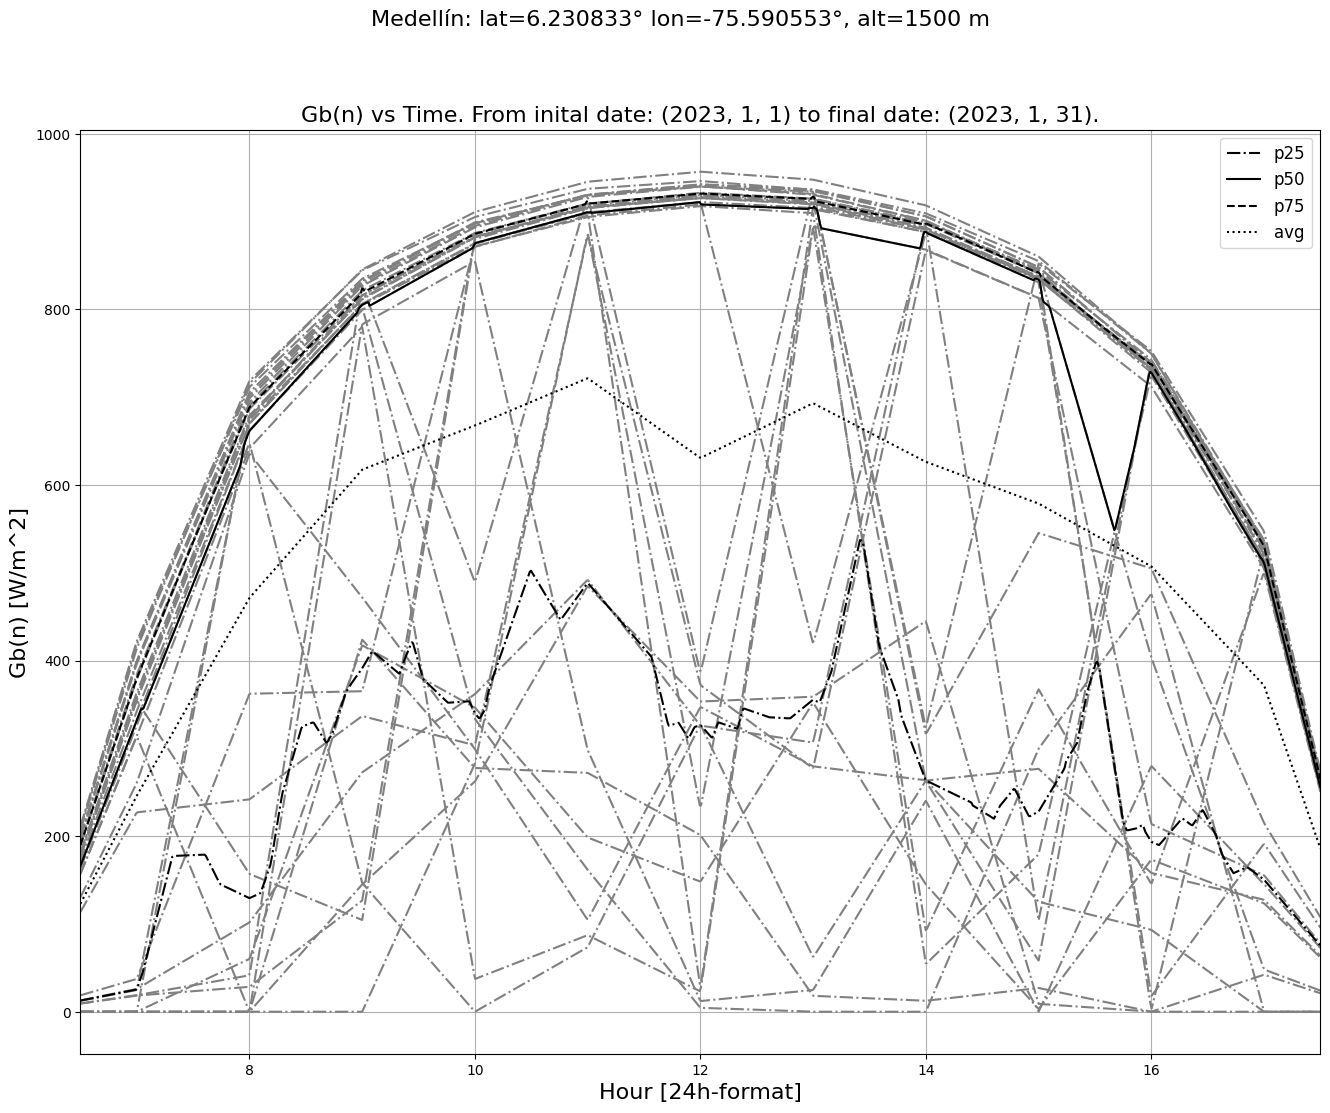

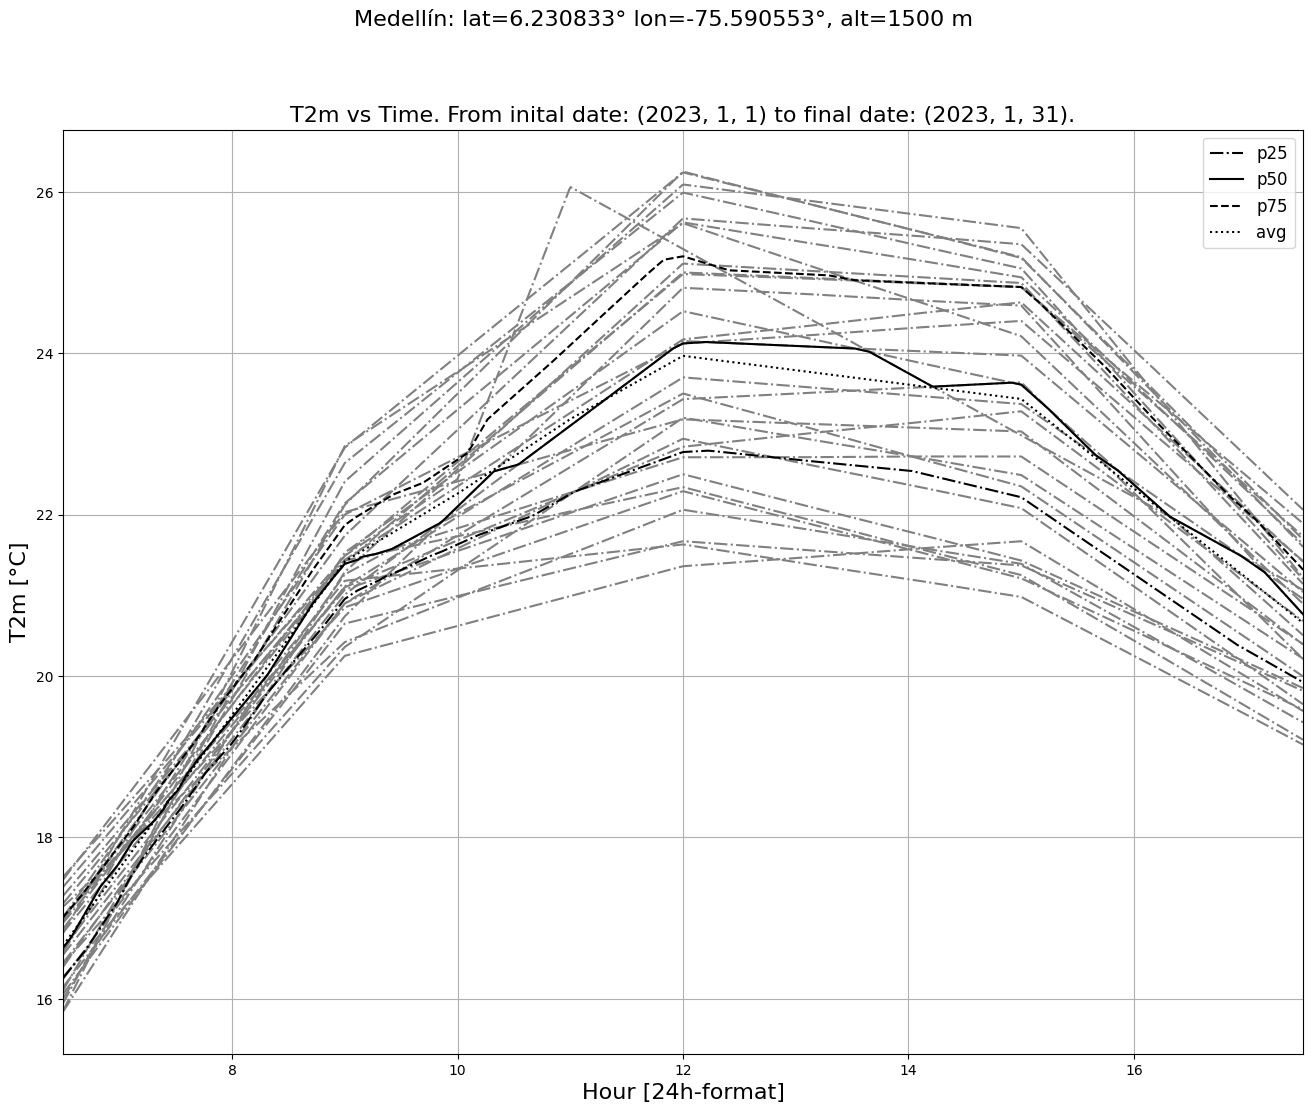

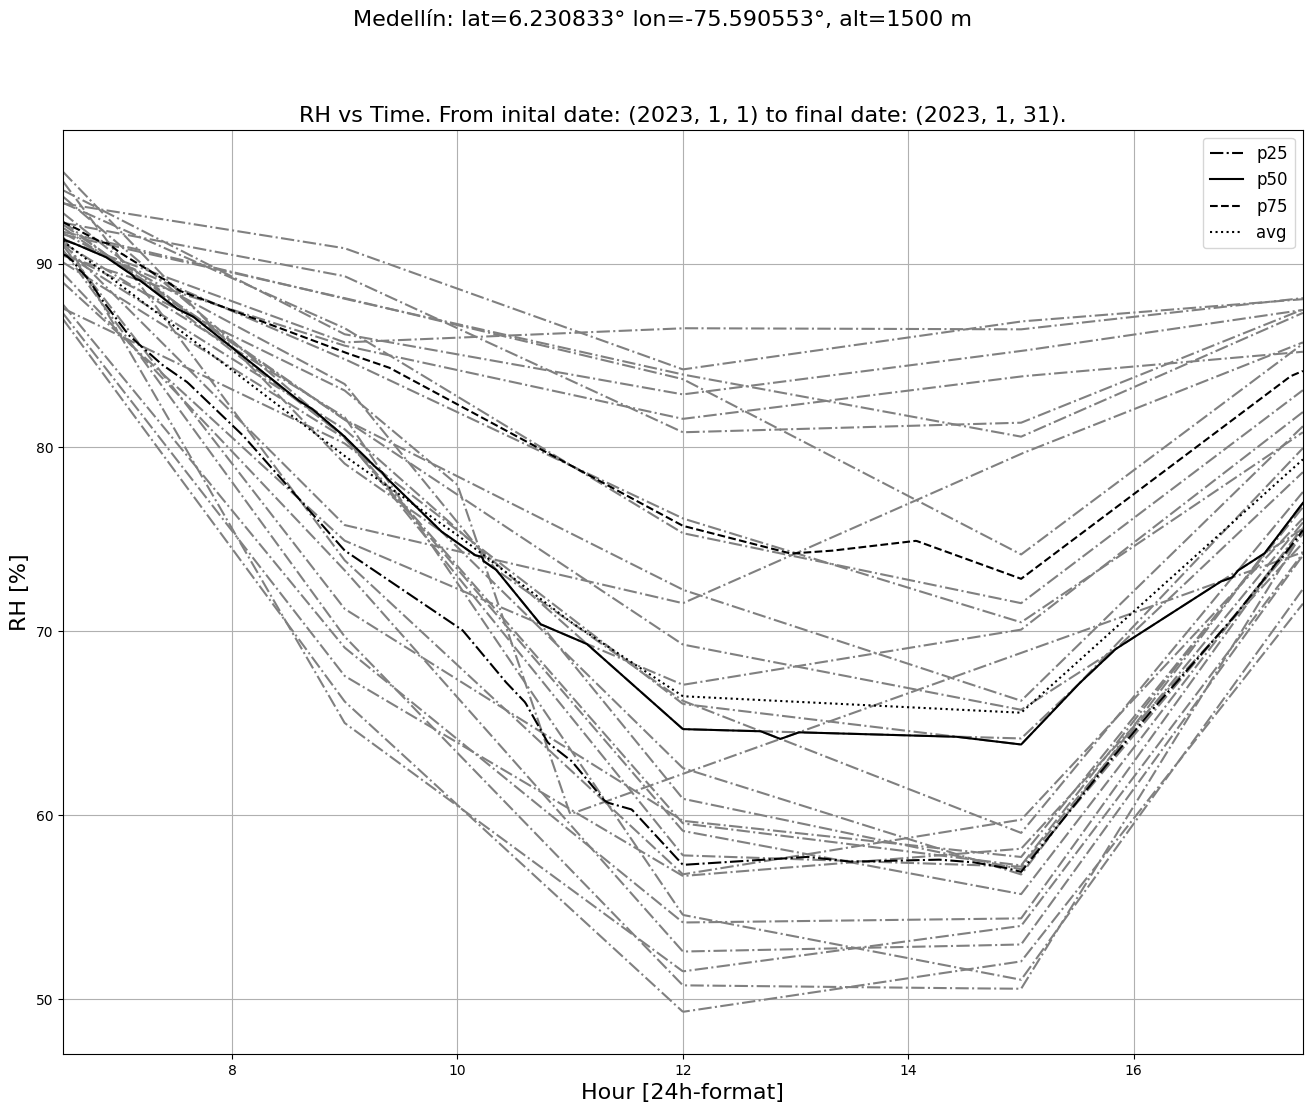

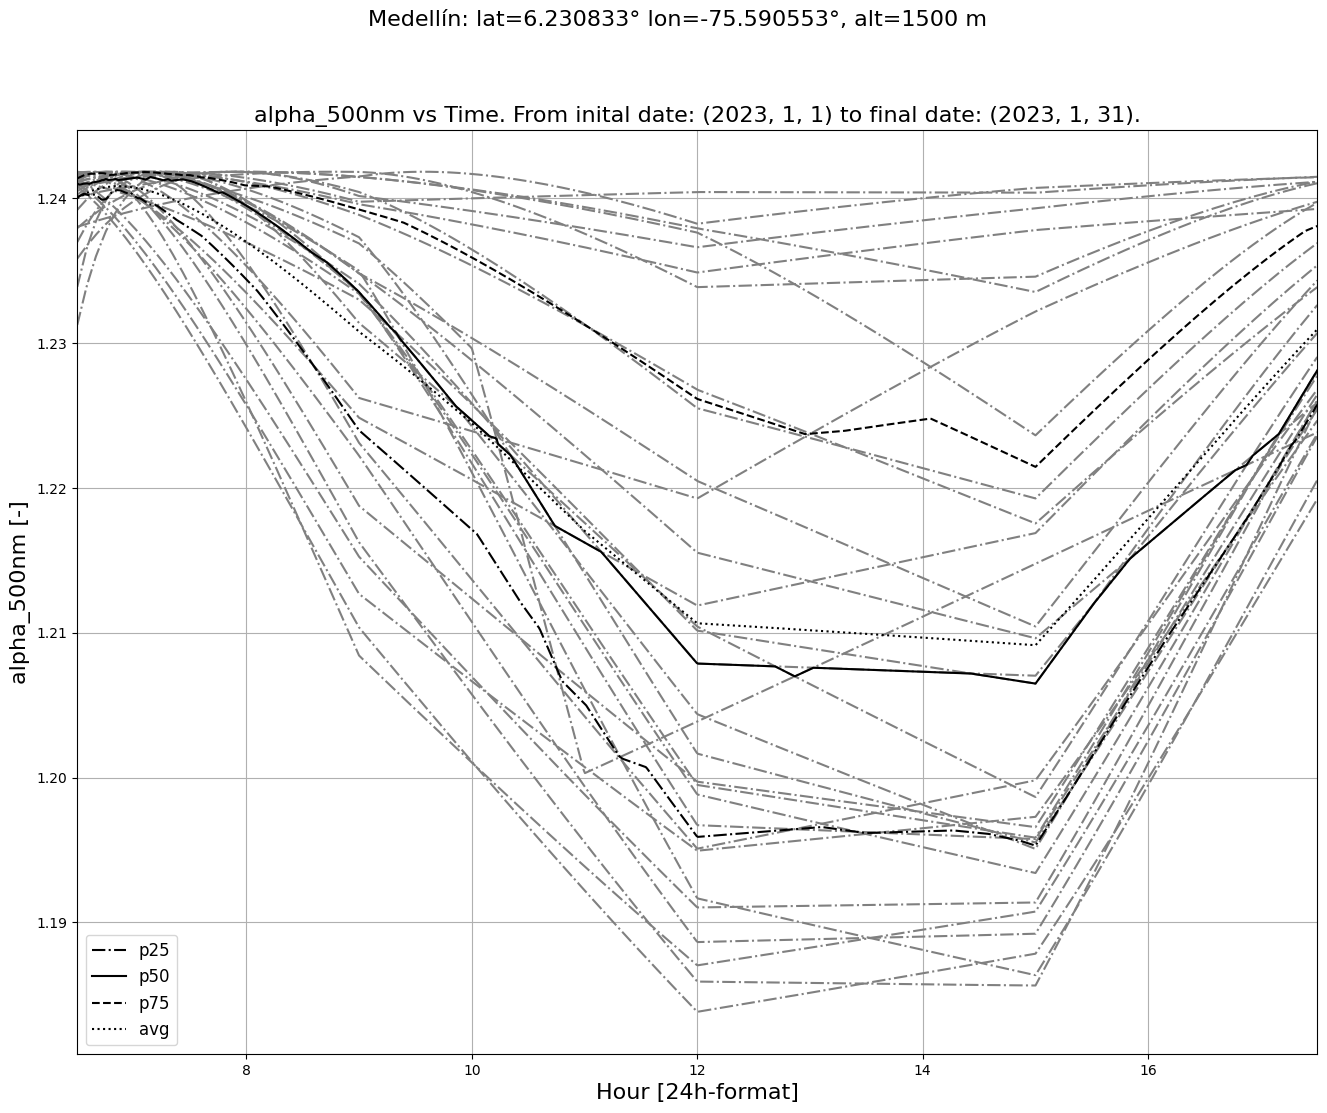

[16.245      16.45277778 16.66055556 16.86833333 17.07611111 17.28333333
 17.49       17.69666667 17.90333333 18.11       18.31666667 18.52333333
 18.73       18.93666667 19.14333333 19.35       19.55666667 19.76333333
 19.97       20.17666667 20.38333333 20.59       20.79666667 20.93777778
 21.01333333 21.08888889 21.16444444 21.24       21.31555556 21.39111111
 21.46666667 21.54222222 21.61777778 21.69333333 21.76888889 21.84444444
 21.92       21.99555556 22.07111111 22.14666667 22.22222222 22.29777778
 22.37333333 22.44888889 22.52444444 22.6        22.67555556 22.75111111
 22.82666667 22.90222222 22.92388889 22.89166667 22.85944444 22.82722222
 22.795      22.76277778 22.73055556 22.69833333 22.66611111 22.63444444
 22.60333333 22.57222222 22.54111111 22.51       22.47888889 22.44777778
 22.41666667 22.38555556 22.35388889 22.32166667 22.28944444 22.25722222
 22.225      22.19277778 22.16055556 22.12833333 22.09611111 22.02611111
 21.91833333 21.81055556 21.70277778 21.595      21

In [13]:

# -- PLOT DATA --

# Normal direct irradiance.
Site_obj.plot_data(col    = "Gb(n)",
                   years  = None, 
                   months = None, 
                   days   = None, 
                   hours  = [6.5, 17.5],
                   mode   = 2, 
                   interp_method = "linear", 
                   figsize = (16, 12))

# Temperature.
Site_obj.plot_data(col = "T2m",
                years = None, 
                months = None, 
                days   = None, 
                hours  = [6.5, 17.5],
                mode   = 2, 
                interp_method = "linear", 
                figsize = (16, 12))

# Humidity.
Site_obj.plot_data(col = "RH",
                   years = None, 
                   months = None, 
                   days   = None, 
                   hours  = [6.5, 17.5],
                   mode   = 2, 
                   interp_method = "linear", 
                   figsize = (16, 12))

# ANGSTROM EXPONENT AT 500 nm
Site_obj.plot_data(col = "alpha_500nm",
                   years = None, 
                   months = None, 
                   days   = None, 
                   hours  = [6.5, 17.5],
                   mode   = 2, 
                   interp_method = "linear", 
                   figsize = (16, 12))


# -- INTERPOLATE DATA --

# Interpolate temperature data.
interpolated_data =\
Site_obj.time_interpolate_variable(col   = "T2m",
                                   year  = 2023,
                                   month = 1,
                                   day   = 1, 
                                   new_hms_float = np.linspace(6.5, 17.5, 100),
                                   interp_method = "linear")

print(interpolated_data)

### 6) SAVE Site_obj
You can easily save the object as a pickle format for later use.

In [18]:
# You must change this path to hwere you want the pickle obj to be stored. Don't leave as is.
EXAMPLES_PATH = os.path.join(os.path.dirname(os.path.dirname(solrad.__path__[0])), "examples")
Site_obj_path = os.path.join(EXAMPLES_PATH, "example_Site_obj.pkl")
aux.save_obj_with_pickle(Site_obj, path = Site_obj_path)